**Utilizing the team list below, please select two teams 
to compare from the 2023-2024 Premier League Season:**
   * Arsenal
   * Aston Villa
   * Bournemouth
   * Brentford
   * Brighton
   * Burnley
   * Chelsea
   * Crystal Palace
   * Everton
   * Fulham
   * Liverpool
   * Luton Town
   * Manchester City
   * Manchester United
   * Newcastle United
   * Nottingham Forest
   * Sheffield United
   * Tottenham Hotspur
   * West Ham United
   * Wolverhampton

**Input team names below:**

In [5]:
team_name1 = str(input('Please enter team #1: '))
team_name2 = str(input('Please enter team #2: '))

Please enter team #1: Chelsea
Please enter team #2: Manchester United


In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from soccerplots.utils import add_image
import matplotlib.colors as mcolors

def darken_color(hex_color, factor=0.8):
    rgb = mcolors.hex2color(hex_color)
    darkened_rgb = tuple(x * factor for x in rgb)
    return mcolors.rgb2hex(darkened_rgb)

In [7]:
df = pd.read_csv('Premier League Team Stats 2023-2024.csv')

df.rename(columns={'Goals Per Match': 'Goals\nPer Match'}, inplace=True)
df.rename(columns={'Goals Conceded Per Match': 'Goals Conceded\nPer Match'}, inplace=True)
df.rename(columns={'Average Possesssion': 'Average\nPossession'}, inplace=True)
df.rename(columns={'Touches in Opposition Box': 'Touches in\nOpposition Box'}, inplace=True)
df.rename(columns={'Shots on Target Per Match': 'Shots on Target\nPer Match'}, inplace=True)
df.rename(columns={'Expected Goals (xG)': 'Expected\nGoals'}, inplace=True)
df.rename(columns={'Expected Goals Conceded (xGC)': 'Expected Goals\nConceded'}, inplace=True)
df.rename(columns={'Accurate Passes Per Match': 'Accurate Passes\nPer Match'}, inplace=True)

params = list(df.columns)
params = params[4:]

team_stats1 = df.loc[df['Team']==team_name1].reset_index()
team_stats1 = list(team_stats1.loc[0])
team_stats1 = team_stats1[5:]
values1 = []

for x in range(len(params)):
    values1.append(math.floor(stats.percentileofscore(df[params[x]],team_stats1[x]))) 
    
values1[5] = 100-values1[5]
values1[6] = 100-values1[6]

baker = PyPizza(params=params, straight_line_color="#000000", background_color="#edede9", straight_line_lw=1, last_circle_lw=1, other_circle_lw=1, other_circle_ls="-.")

original_color1 = f"{df.loc[df['Team']==team_name1,'Team Color'].iloc[0]}"
darkened_color1 = darken_color(original_color1, 0.7)

fig1, ax = baker.make_pizza(values1, figsize=(8, 8), param_location=112.5, 
                            kwargs_slices=dict(facecolor=original_color1, edgecolor="#000000", zorder=2, linewidth=1),
                            kwargs_params=dict(color="#000000", fontsize=10,va="center",weight='bold'), 
                            kwargs_values=dict(color="white", fontsize=14, zorder=3,weight='bold', 
                                               bbox=dict(edgecolor="#000000", facecolor=darkened_color1,boxstyle="round,pad=0.2", lw=1)))

fig1.set_facecolor('#edede9')

fig1.text(
    0.515, 0.957, f"{team_name1}", size=33,ha="center", color=darkened_color1,weight='bold')

fig1.text(0.515, 0.02,"Final League Position: " + f"{df.loc[df['Team'] == team_name1, 'Table Position'].iloc[0]}"+ "th",size=15,
    ha="center", color='black',weight='bold')

plt.close()

team_stats2 = df.loc[df['Team']==team_name2].reset_index()
team_stats2 = list(team_stats2.loc[0])
team_stats2 = team_stats2[5:]
values2 = []

for x in range(len(params)):
    values2.append(math.floor(stats.percentileofscore(df[params[x]],team_stats2[x]))) 
    
values2[5] = 100-values2[5]
values2[6] = 100-values2[6]

baker = PyPizza(params=params, straight_line_color="#000000", background_color="#edede9",straight_line_lw=1, last_circle_lw=1, other_circle_lw=1, other_circle_ls="-.")

original_color2 = f"{df.loc[df['Team']==team_name2,'Team Color'].iloc[0]}"
darkened_color2 = darken_color(original_color2, 0.7)

fig2, ax = baker.make_pizza(values2, figsize=(8, 8), param_location=112.5, 
                            kwargs_slices=dict(facecolor=original_color2, edgecolor="#000000", zorder=2, linewidth=1),
                            kwargs_params=dict(color="#000000", fontsize=10,va="center",weight='bold',zorder=4), 
                            kwargs_values=dict(color="white", fontsize=14, zorder=3,weight='bold',va='center',
                                               bbox=dict(edgecolor="#000000", facecolor=darkened_color2,boxstyle="round,pad=0.2", lw=1)))

fig2.set_facecolor('#edede9')


fig2.text(
    0.515, 0.957, f"{team_name2}", size=33,ha="center", color=darkened_color2,weight='bold')

fig2.text(0.515, 0.02,"Final League Position: " + f"{df.loc[df['Team'] == team_name2, 'Table Position'].iloc[0]}"+ "th",size=15,
    ha="center", color='black',weight='bold')


plt.close()

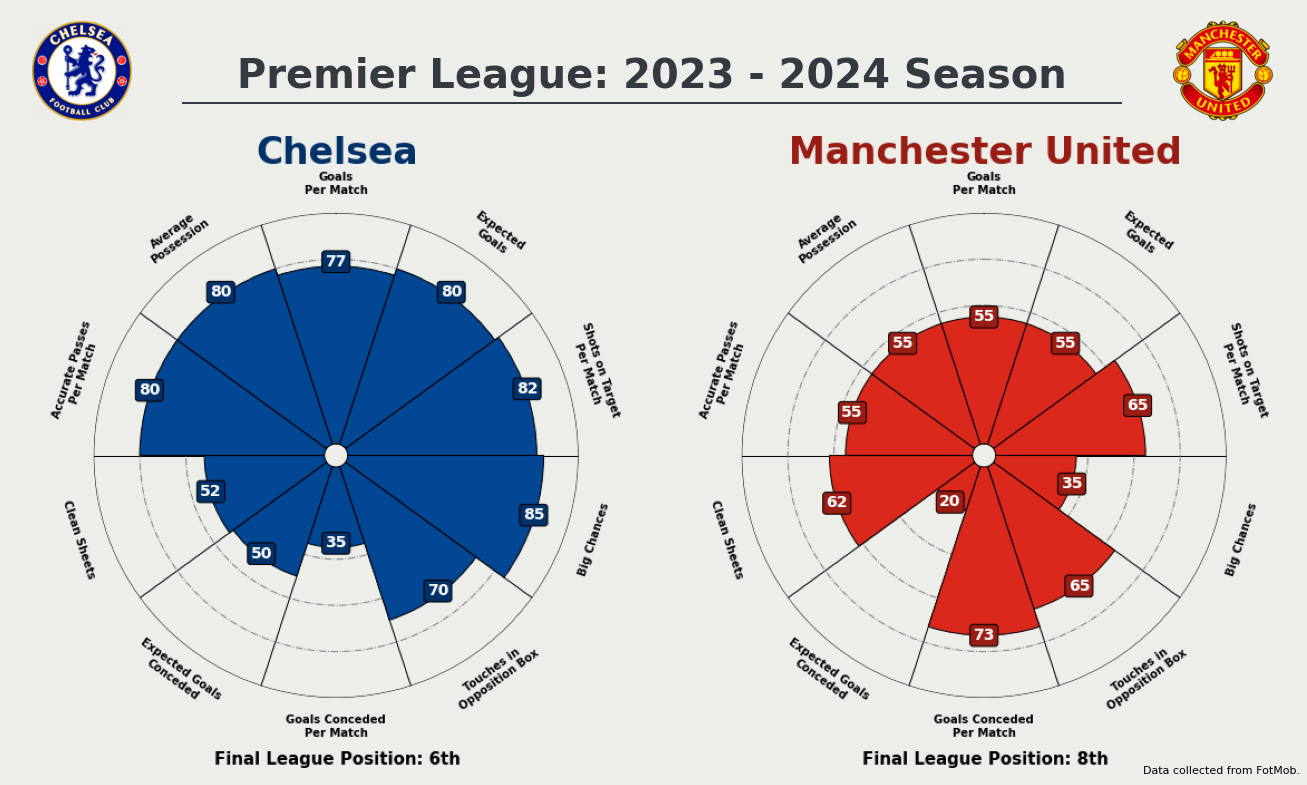

In [8]:
fig = plt.figure(layout='constrained',figsize=(18,30))

gs0 = gridspec.GridSpec(3, 2, figure=fig, width_ratios=[1,1], height_ratios=[0.05,0.5,1])


gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[0,0:2])
ax0 = fig.add_subplot(gs1[0,0])

gs2 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[1,0])
ax1 = fig.add_subplot(gs2[0,0])

gs3 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[1,1])
ax2 = fig.add_subplot(gs3[0,0])


for ax in fig1.axes:
    fig1_canvas = ax.figure.canvas
    fig1_canvas.draw()
    ax1.imshow(fig1_canvas.renderer.buffer_rgba())
for ax in fig2.axes:
    fig2_canvas = ax.figure.canvas
    fig2_canvas.draw()
    ax2.imshow(fig2_canvas.renderer.buffer_rgba())

ax0.axis('off')
ax1.axis('off')
ax2.axis('off')

fig.set_facecolor('#edede9')
ax0.set_facecolor('#edede9')

ax0.text(0.5, 0.45, 'Premier League: 2023 - 2024 Season', ha='center', va='center', fontsize=40,weight='bold',color='#343a40')
ax0.plot([0.1, 0.9], [0, 0], color='#343a40', lw=2) 
ax0.plot([0, 1], [1, 1], color='black', lw=0)

CREDIT_1 = "Data collected from FotMob."

fig.text(
    1, 0.66, f"{CREDIT_1}", size=11,
    color="#000000",
    ha="right"
)

fig = add_image(image="Premier League Logos/"+f"{df.loc[df['Team']==team_name1,'Team Image'].iloc[0]}", fig=fig, left=0.01, bottom=0.955, width=0.1, height=0.06)
fig = add_image(image="Premier League Logos/"+f"{df.loc[df['Team']==team_name2,'Team Image'].iloc[0]}", fig=fig, left=0.89, bottom=0.955, width=0.1, height=0.06)

plt.show()